In [ ]:
import os, random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
data_frame=pd.read_csv('/content/전처리_0508.csv')
drop_col_liset=[]
SEED=2022
random.seed(SEED)

In [ ]:
data_frame

,Datetime,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power,Man_Cost,Power_Usage
0,2021-02-08 0:15,116,-4.2,65.6,109.8,0,0.13,1.5,103
1,2021-02-08 0:30,116,-4.2,63.5,109.8,0,0.13,1.5,100
2,2021-02-08 0:45,114,-4.2,67.6,109.8,0,0.14,1.5,109
3,2021-02-08 1:00,114,-5.5,72.8,109.8,0,0.13,1.5,161
4,2021-02-08 1:15,116,-5.5,67.4,109.8,0,0.15,1.5,136
...,...,...,...,...,...,...,...,...,...
24474,2021-10-21 22:45,129,23.6,74.0,167.2,3,0.30,1.5,162
24475,2021-10-21 23:00,217,22.5,74.6,167.2,3,1.07,1.5,134
24476,2021-10-21 23:15,217,22.2,71.3,167.2,3,1.05,1.5,157
24477,2021-10-21 23:30,213,23.1,72.7,167.2,3,1.05,1.5,163


In [ ]:
data_frame.head()

,Datetime,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power,Man_Cost,Power_Usage
0,2021-02-08 0:15,116,-4.2,65.6,109.8,0,0.13,1.5,103
1,2021-02-08 0:30,116,-4.2,63.5,109.8,0,0.13,1.5,100
2,2021-02-08 0:45,114,-4.2,67.6,109.8,0,0.14,1.5,109
3,2021-02-08 1:00,114,-5.5,72.8,109.8,0,0.13,1.5,161
4,2021-02-08 1:15,116,-5.5,67.4,109.8,0,0.15,1.5,136


In [ ]:
data_frame.tail()

,Datetime,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power,Man_Cost,Power_Usage
24474,2021-10-21 22:45,129,23.6,74.0,167.2,3,0.30,1.5,162
24475,2021-10-21 23:00,217,22.5,74.6,167.2,3,1.07,1.5,134
24476,2021-10-21 23:15,217,22.2,71.3,167.2,3,1.05,1.5,157
24477,2021-10-21 23:30,213,23.1,72.7,167.2,3,1.05,1.5,163
24478,2021-10-21 23:45,215,22.2,71.6,167.2,3,1.06,1.5,157


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      24479 non-null  object 
 1   Production    24479 non-null  int64  
 2   Temperature   24479 non-null  float64
 3   Humidity      24479 non-null  float64
 4   Power_Cost    24479 non-null  float64
 5   DoW           24479 non-null  int64  
 6   Worker_Power  24479 non-null  float64
 7   Man_Cost      24479 non-null  float64
 8   Power_Usage   24479 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
해for col in data_frame.columns:
  null_count='column:{:>10}\tPercent of NaN value:{:.2f}%'.format(col, 100*(data_frame[col].isnull().sum()/data_frame[col].shape[0]))
  print(null_count)

column:  Datetime	Percent of NaN value:0.00%
column:Production	Percent of NaN value:0.00%
column:Temperature	Percent of NaN value:0.00%
column:  Humidity	Percent of NaN value:0.00%
column:Power_Cost	Percent of NaN value:0.00%
column:       DoW	Percent of NaN value:0.00%
column:Worker_Power	Percent of NaN value:0.00%
column:  Man_Cost	Percent of NaN value:0.00%
column:Power_Usage	Percent of NaN value:0.00%


In [ ]:
data_frame.describe()

,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power,Man_Cost,Power_Usage
count,24479.000000,24479.000000,24479.000000,24479.000000,24479.000000,24479.000000,24479.000000,24479.000000
mean,231.557988,16.332203,63.231562,162.533135,3.023653,1.042010,1.312492,136.468238
std,214.886001,9.679980,24.224441,30.831938,1.993958,1.989461,0.242068,58.113685
min,112.000000,-13.700000,-2.000000,109.800000,0.000000,0.120000,1.000000,39.000000
25%,114.000000,9.500000,45.600000,167.200000,1.000000,0.140000,1.000000,68.000000
50%,126.000000,17.800000,67.400000,167.200000,3.000000,0.250000,1.500000,147.000000
75%,276.000000,24.100000,84.900000,191.600000,5.000000,1.310000,1.500000,186.000000
max,2573.000000,36.000000,97.000000,191.600000,6.000000,48.530000,1.500000,270.000000


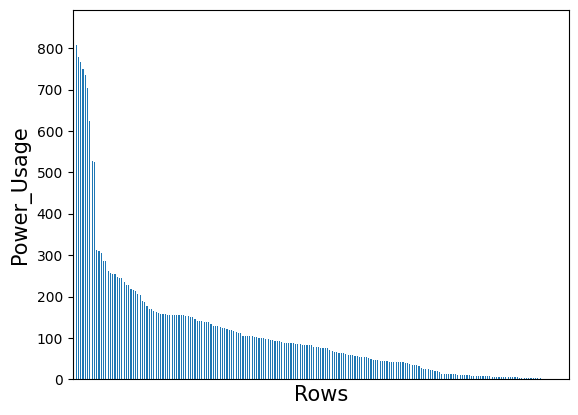

In [ ]:
ax=plt.gca()
data_frame['Power_Usage'].value_counts().plot.bar(ax=ax)
ax.set_xlabel('Rows', fontsize=15)
ax.set_ylabel('Power_Usage', fontsize=15)
ax.set_xticks([])
ax.axes.xaxis.set_visible(True)

Text(0, 0.5, 'Counts')

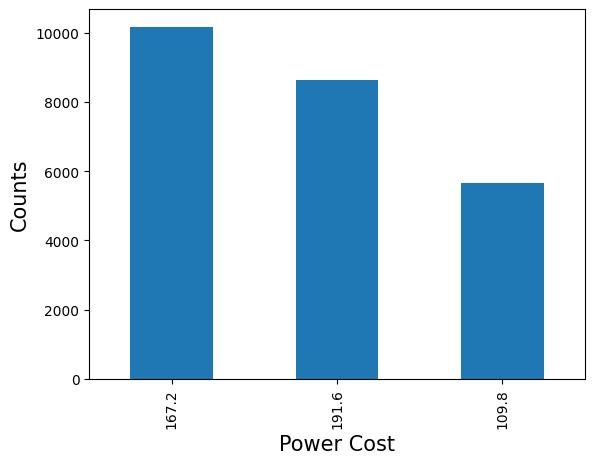

In [ ]:
ax=plt.gca()
data_frame['Power_Cost'].value_counts().plot.bar(ax=ax)
ax.set_xlabel('Power Cost', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

In [ ]:
day_list=list(data_frame['DoW'].unique())
print('DoW의 unique 값', day_list)

DoW의 unique 값 [0, 1, 2, 3, 4, 5, 6]


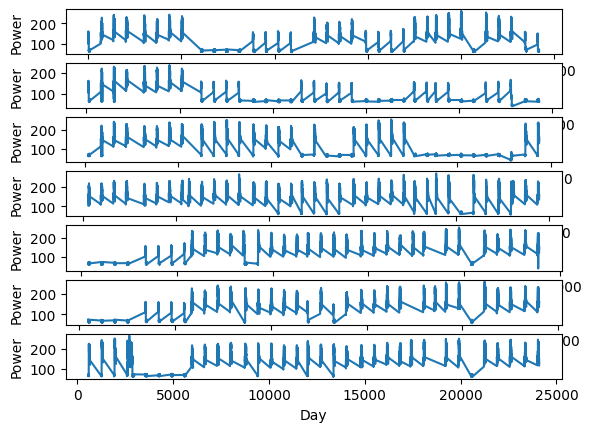

In [ ]:
day_list=list(data_frame['DoW'].unique())
for di, day in enumerate(day_list):
  plt.subplot(7, 1, di+1)
  plt.xlabel('Day')
  plt.ylabel('Power')
  data_frame[data_frame['DoW']==day]['Power_Usage'].plot()

In [ ]:
drop_col_list=[]
drop_col_list.append('Power_Cost')

In [ ]:
ㅔdef categorical_season_label(data_frame):
  date_list=[int(datestr.split('-')[1]) for datestr in list(data_frame['Datetime'])]
  season_list=[]
  for date in date_list:
    if 3<= date and date<6:
      season_list.append(0)
    elif 6<= date and date<9:
      season_list.append(1)
    elif 9<= date and date<12:
      season_list.append(2)
    else:
      season_list.append(3)
  return season_list
data_frame['season']=categorical_season_label(data_frame)
drop_col_list.append('Datetime')

In [ ]:
drop_col_list.append('DoW')

In [ ]:
data_frame=data_frame.sample(frac=1)
train_len=round(len(data_frame)*0.7)
train_dataframe=data_frame[:train_len]
test_dataframe=data_frame[train_len:]

train_Power_usage=list(train_dataframe['Power_Usage'])
test_Power_usage=list(test_dataframe['Power_Usage'])

train_man_cost=list(train_dataframe['Man_Cost'])
train_power_cost=list(train_dataframe['Power_Cost'])
test_man_cost=list(test_dataframe['Man_Cost'])
test_power_cost=list(test_dataframe['Power_Cost'])

drop_col_list.append('Man_Cost')
drop_col_list.append('Power_Usage')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_data_x=test_dataframe.drop(drop_col_list, axis=1)
train_data_x=train_dataframe.drop(drop_col_list, axis=1)

rf_reg=RandomForestRegressor(max_depth=5)
rf_reg.fit(train_data_x, train_Power_usage)

RandomForestRegressor(max_depth=5)

In [ ]:
train_result=rf_reg.predict(train_data_x)
print(mean_squared_error(train_result, train_Power_usage))

1042.4204461685108


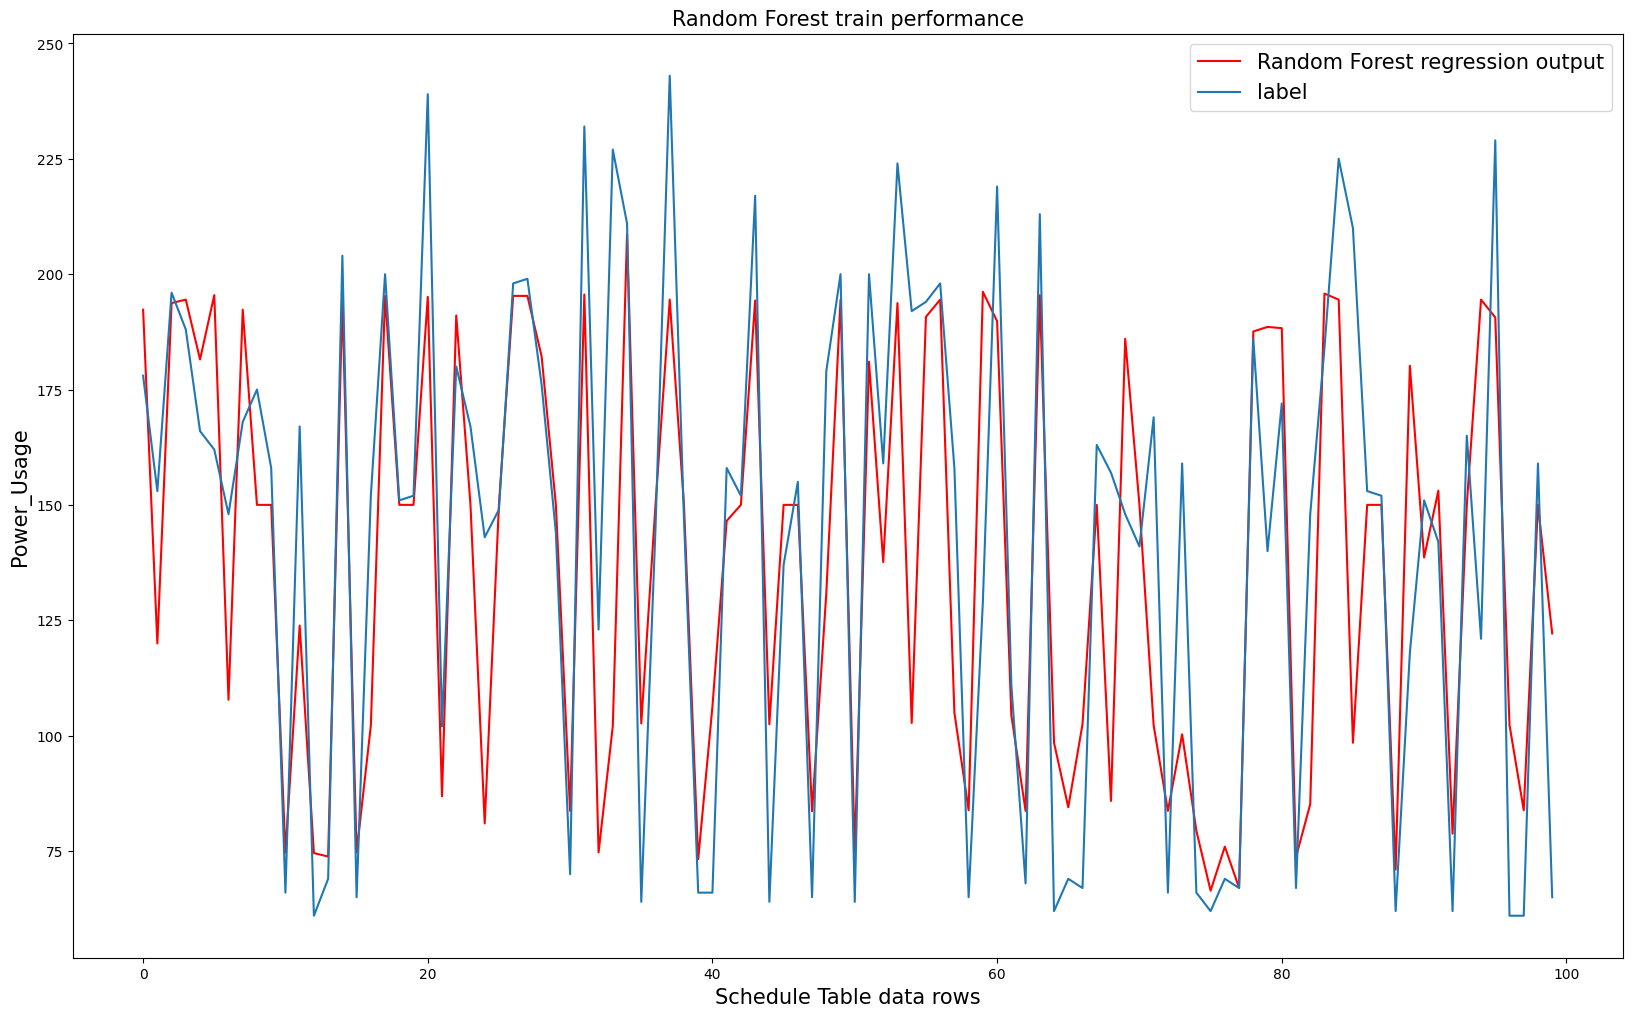

In [ ]:
fig, ax=plt.subplots(figsize=(20, 12))
ax.plot(train_result[:100], color='red', label='Random Forest regression output')
ax.plot(train_Power_usage[:100], label='label')
ax.set_xlabel('Schedule Table data rows')
ax.set_ylabel('Power_Usage')
ax.set_title('Random Forest train performance')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.title.set_fontsize(15)
plt.legend(fontsize=15)

In [ ]:
test_result=rf_reg.predict(test_data_x)
print(mean_squared_error(test_result, test_Power_usage))

1044.1130734764945


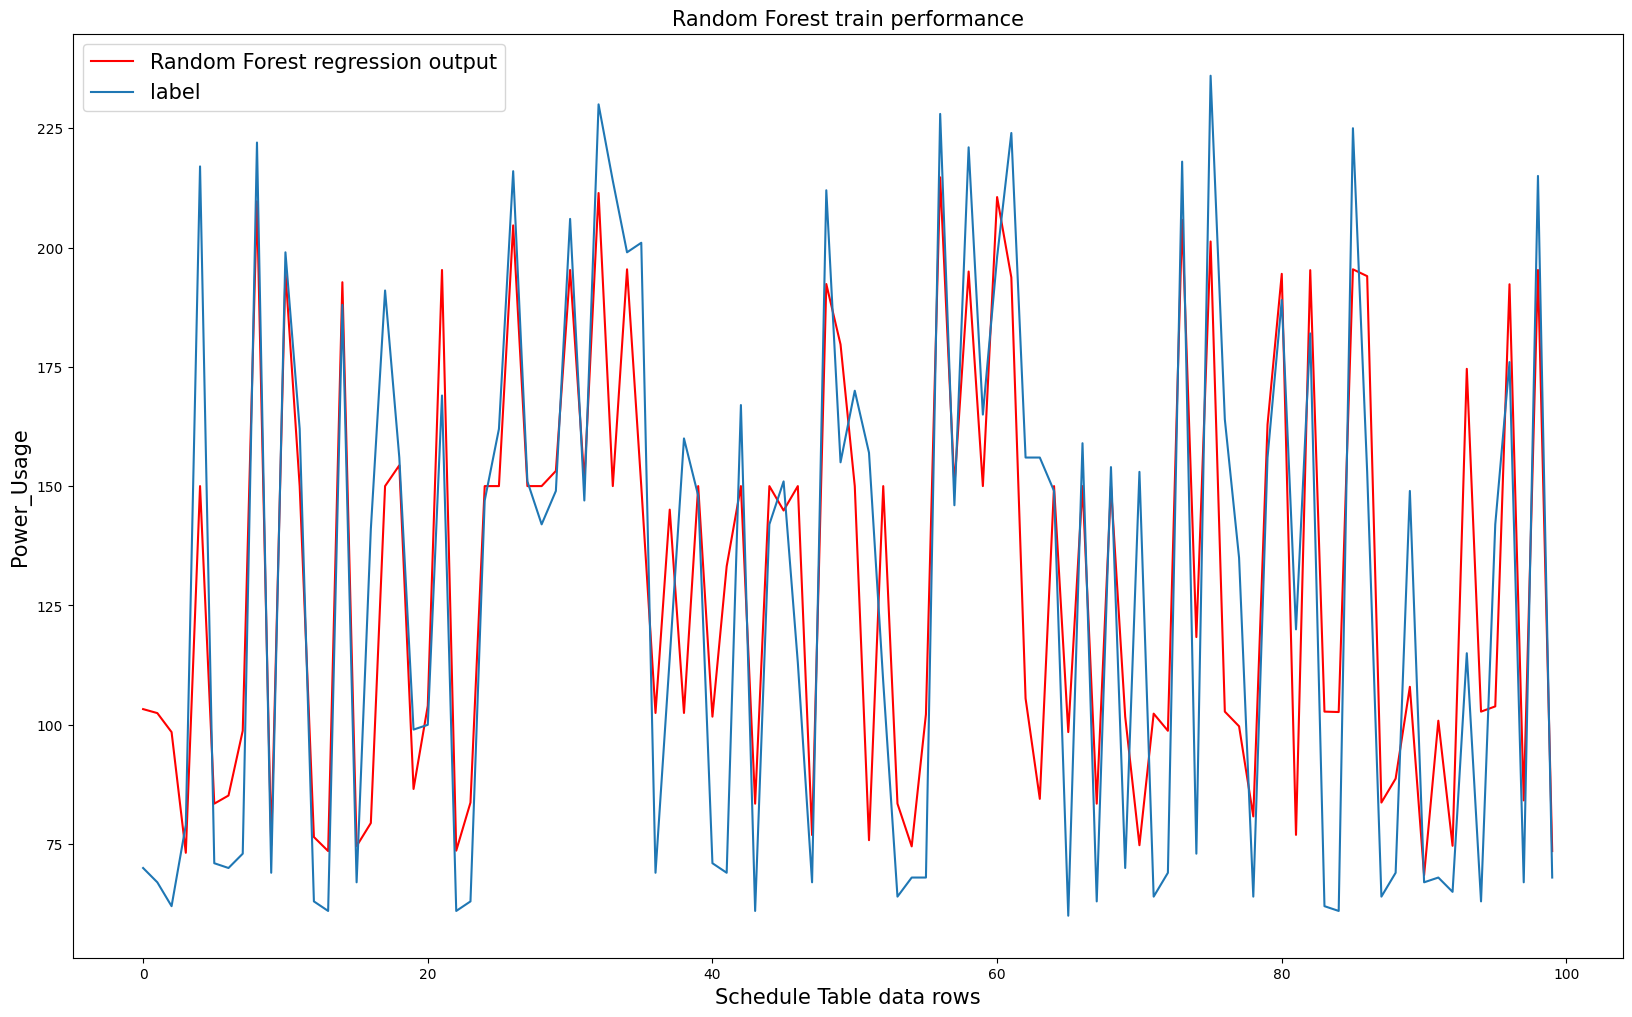

In [ ]:
fig, ax=plt.subplots(figsize=(20, 12))
ax.plot(test_result[:100], color='red', label='Random Forest regression output')
ax.plot(test_Power_usage[:100], label='label')
ax.set_xlabel('Schedule Table data rows')
ax.set_ylabel('Power_Usage')
ax.set_title('Random Forest test performance')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.title.set_fontsize(15)
plt.legend(fontsize=15)

In [ ]:
!pip install ortools
from ortools.linear_solver import pywraplp
solution_list=[]
work_list=[]
sol_work_list=[]

for i, cost in enumerate(test_man_cost):
  solver=pywraplp.Solver.CreateSolver('GLOP')
  x=solver.IntVar(10, solver.infinity(), "x")
  solver.Minimize(x*(cost+test_result[i]))
  solver.Add(x*(cost+test_result[i])>=test_power_cost[i]*test_Power_usage[i])
  solver.Add(x>=10)
  solver.Solve()
  solution_list.append(x.solution_value())
  work_list.append(test_power_cost[i]*test_Power_usage[i])
  sol_work_list.append(int(x.solution_value()+1)*(cost+test_result[i]))

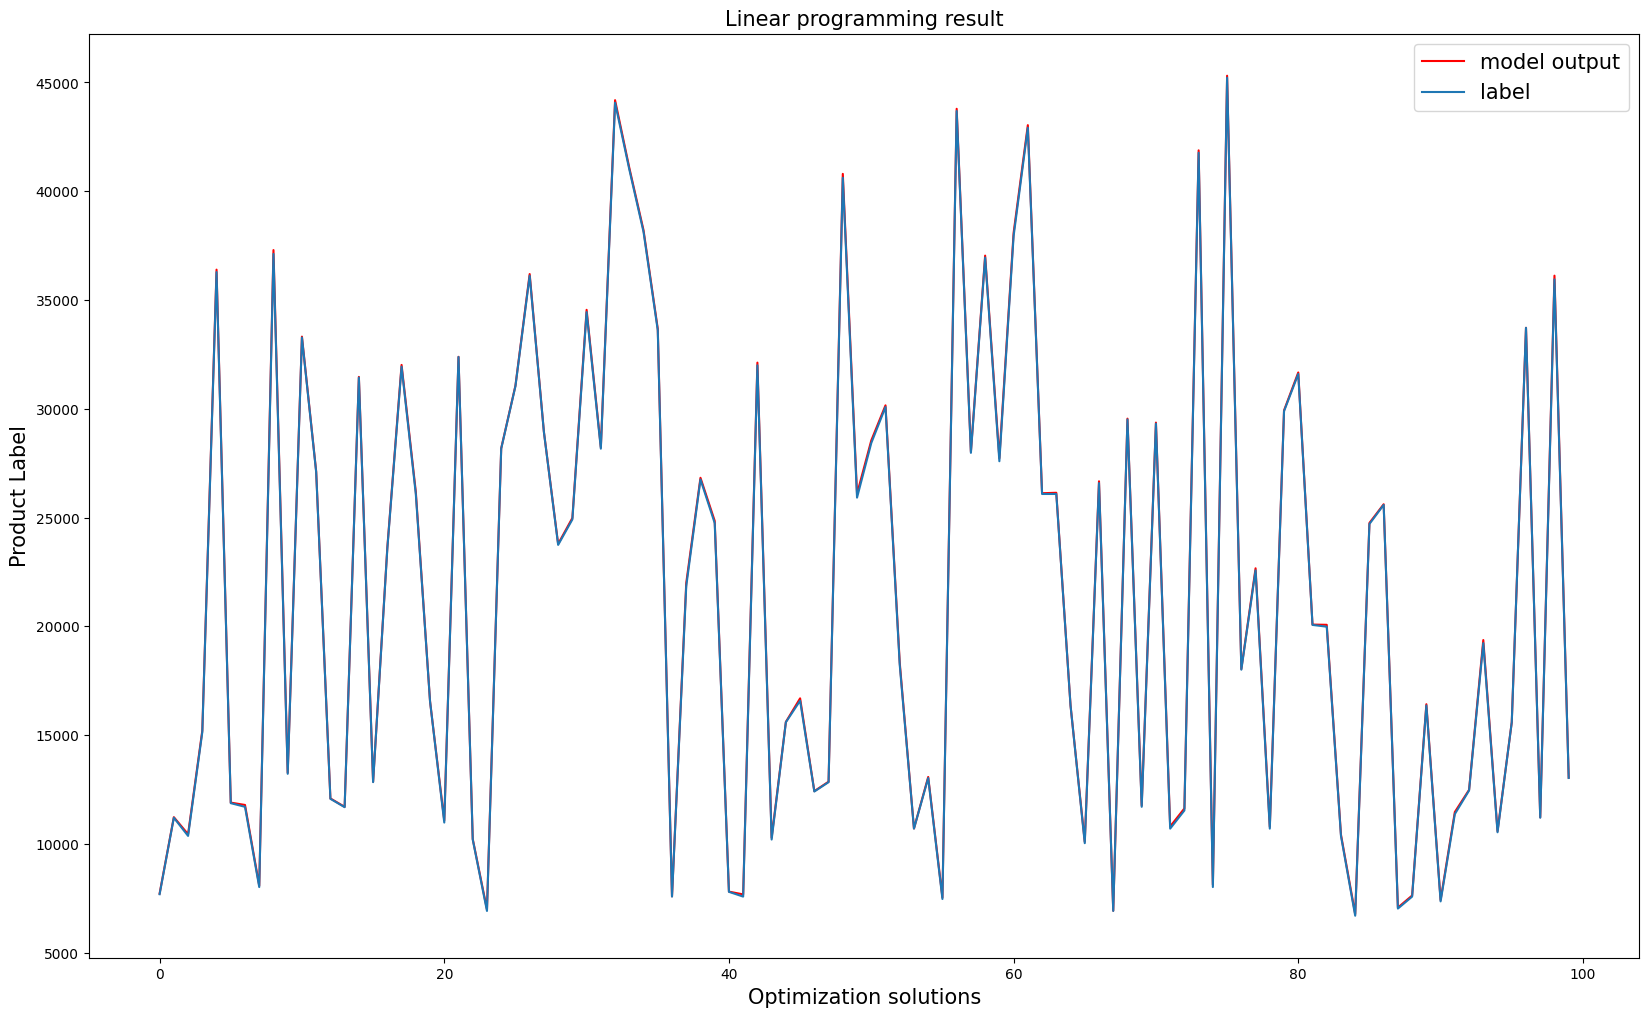

In [ ]:
fig, ax=plt.subplots(figsize=(20, 12))
ax.plot(sol_work_list[:100], color='red', label='model output')
ax.plot(work_list[:100], label='label')
ax.set_xlabel('Optimization solutions')
ax.set_ylabel('Product Label')
ax.set_title('Linear programming result')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.title.set_fontsize(15)
plt.legend(fontsize=15)